# Fair Coin Problem   
reference: https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/

In [2]:
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set(style='ticks', palette='Set2')

## For example, let's toss a coin for 800 times. Where 1 indicates a head.

In [18]:
data_coin_flips = np.random.randint(2, size=800) 
np.mean(data_coin_flips)

0.51625

## Likelihood Distribution   
A likelihood distribution is the probability of seeing our data ($X$) given our parameters ($\theta$). This is written as $p(X|\theta)$.  
We are guessing the Distributions.

We are thinking that this distribution is a Bernoulli Distribution.    
Let's plot the distribution of observing such data along different values of p (probability of P(toss a coin and get a head)).

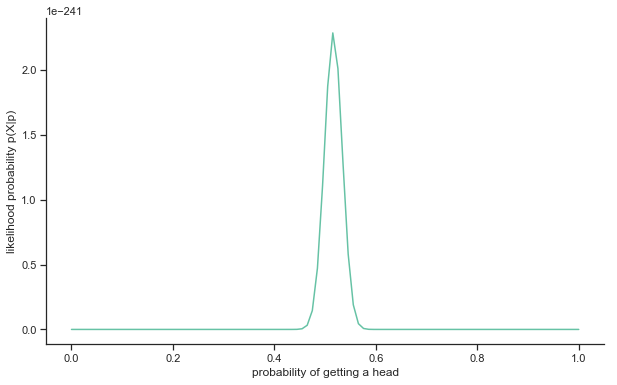

In [20]:
params = np.linspace(0, 1, 100)

#calculate P(X|P_heads = p)
p_x = [np.product(st.bernoulli.pmf(data_coin_flips, p)) for p in params]
plt.figure(figsize = (10,6))
plt.plot(params, p_x)
plt.xlabel('probability of getting a head')
plt.ylabel('likelihood probability p(X|p)')
sns.despine()

## Prior Distribution  

What do Bayes mean by prior distribution? It is the $p(\theta)$ or the probability of seeing a specific value for our parameter.   
That is the probability we would have assumed before seeing any data.   
Let's assume a fair coin here.

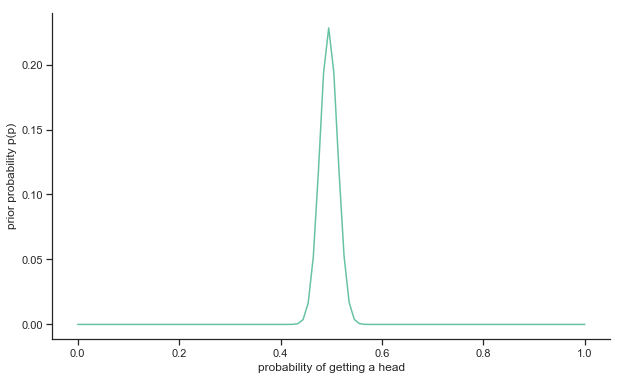

In [28]:
fair_flips = bernoulli_flips = np.random.binomial(n=1, p=.5, size=800)
p_fair = np.array([np.product(st.bernoulli.pmf(fair_flips, p)) for p in params])
#normalize it to something between [0,1]
p_fair = p_fair / np.sum(p_fair)
plt.figure(figsize = (10,6))
plt.plot(params, p_fair)
plt.xlabel('probability of getting a head')
plt.ylabel('prior probability p(p)')
sns.despine()

## Posterior Distribution  

In [34]:
def bern_post(n_params=100, n_sample=100, true_p=.8, prior_p=.5, n_prior=100):
    
    '''
    redo everything we did before.

    '''
    params = np.linspace(0, 1, n_params)
    sample = np.random.binomial(n=1, p=true_p, size=n_sample)
    likelihood = np.array([np.product(st.bernoulli.pmf(sample, p)) for p in params])
    #likelihood = likelihood / np.sum(likelihood)
    prior_sample = np.random.binomial(n=1, p=prior_p, size=n_prior)
    prior = np.array([np.product(st.bernoulli.pmf(prior_sample, p)) for p in params])
    prior = prior / np.sum(prior)
    
    '''
    calculate the posterior here.

    '''
    posterior = [prior[i] * likelihood[i] for i in range(prior.shape[0])]
    posterior = posterior / np.sum(posterior)
     
    '''
    plot them out
    '''
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8,8))
    axes[0].plot(params, likelihood)
    axes[0].set_xlabel('probability of getting a head')
    axes[0].set_ylabel('likelihood probability p(X|p)')      
    axes[0].set_title("Likelihood Distribution")
    
    axes[1].plot(params, prior)
    axes[1].set_xlabel('probability of getting a head')
    axes[1].set_ylabel('prior probability p(p)')      
    axes[1].set_title("Prior Distribution")
      
    axes[2].plot(params, posterior)
    axes[2].set_xlabel('probability of getting a head')
    axes[2].set_ylabel('posterior probability p(p|X)') 
    axes[2].set_title("Posterior Distribution")
    sns.despine()
    plt.tight_layout()
     
    return posterior

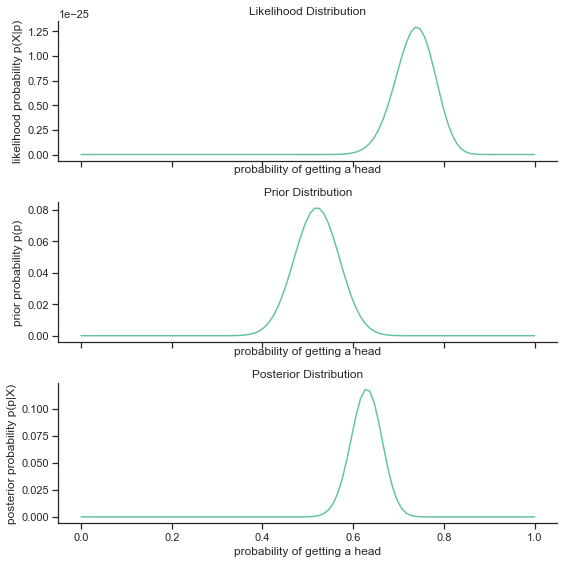

In [35]:
#data sample size = 100
example_post = bern_post()

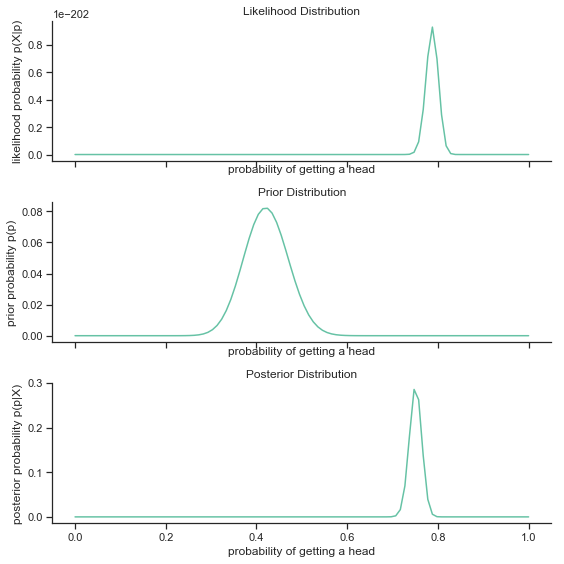

In [36]:
#data sample size = 900
# Likelihood Distribution approaching Posterior (that is, we got something accurate)
example_post = bern_post(n_sample = 900)